## Random forest company data

In [34]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

### EDA and Visualization

In [3]:
df.shape

(400, 11)

In [4]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
#convrting target variable Sales into Categorical variable

In [10]:
len(df.Sales.unique())

336

In [11]:
df.Sales.values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [12]:
df['Sales'] = pd.cut(x=df['Sales'],bins=[0,6,12,17], labels=['Low', 'Medium', 'High'], right=False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [14]:
encoder1 = LabelEncoder()
df['ShelveLoc'] = encoder1.fit_transform(df['ShelveLoc'])
df['Urban'] = encoder1.fit_transform(df['Urban'])
df['US'] = encoder1.fit_transform(df['US'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

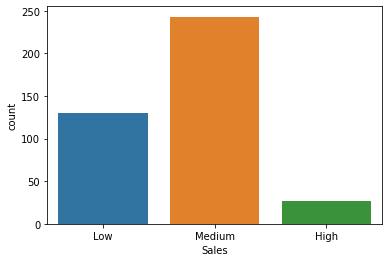

In [15]:
sns.countplot(df['Sales'])

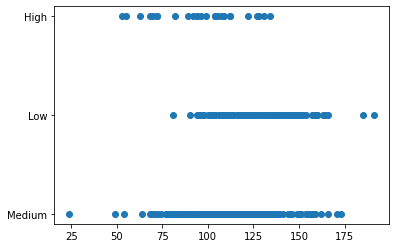

In [17]:
plt.scatter(x = 'Price', y='Sales', data=df)

In [19]:
#Checking correlation with the data
df.corr()

CompPrice    Income  Advertising  Population     Price  \
CompPrice     1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price         0.584848 -0.056698     0.044537   -0.012144  1.000000   
ShelveLoc     0.023350 -0.067678     0.008544   -0.044772  0.014633   
Age          -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education     0.025197 -0.056855    -0.033594   -0.106378  0.011747   
Urban         0.066594  0.037967     0.042035   -0.052025  0.047016   
US            0.016869  0.089601     0.684460    0.060564  0.057861   

             ShelveLoc       Age  Education     Urban        US  
CompPrice     0.023350 -0.100239   0.025197  0.066594  0.016869  
Income       -0.067678 -0.004670  -0.056855  0.037967  0.089601  
Advertising   0.008544 -0.004557  -0.033594  0.042035  0.684460  
Population   -0.044772 -0.042663  -0.106378 -0.052025  0.060564  
Price         0.014633 -0.102177   0.011747  0.047016  0.057861  
ShelveLoc     1.000000  0.056488   0.001492 -0.063978 -0.039760  
Age           0.056488  1.000000   0.006488  0.028479  0.008652  
Education     0.001492  0.006488   1.000000 -0.033094 -0.078250  
Urban        -0.063978  0.028479  -0.033094  1.000000  0.047085  
US           -0.039760  0.008652  -0.078250  0.047085  1.000000

array([[<AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Advertising'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'ShelveLoc'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Urban'}>],
       [<AxesSubplot:title={'center':'US'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

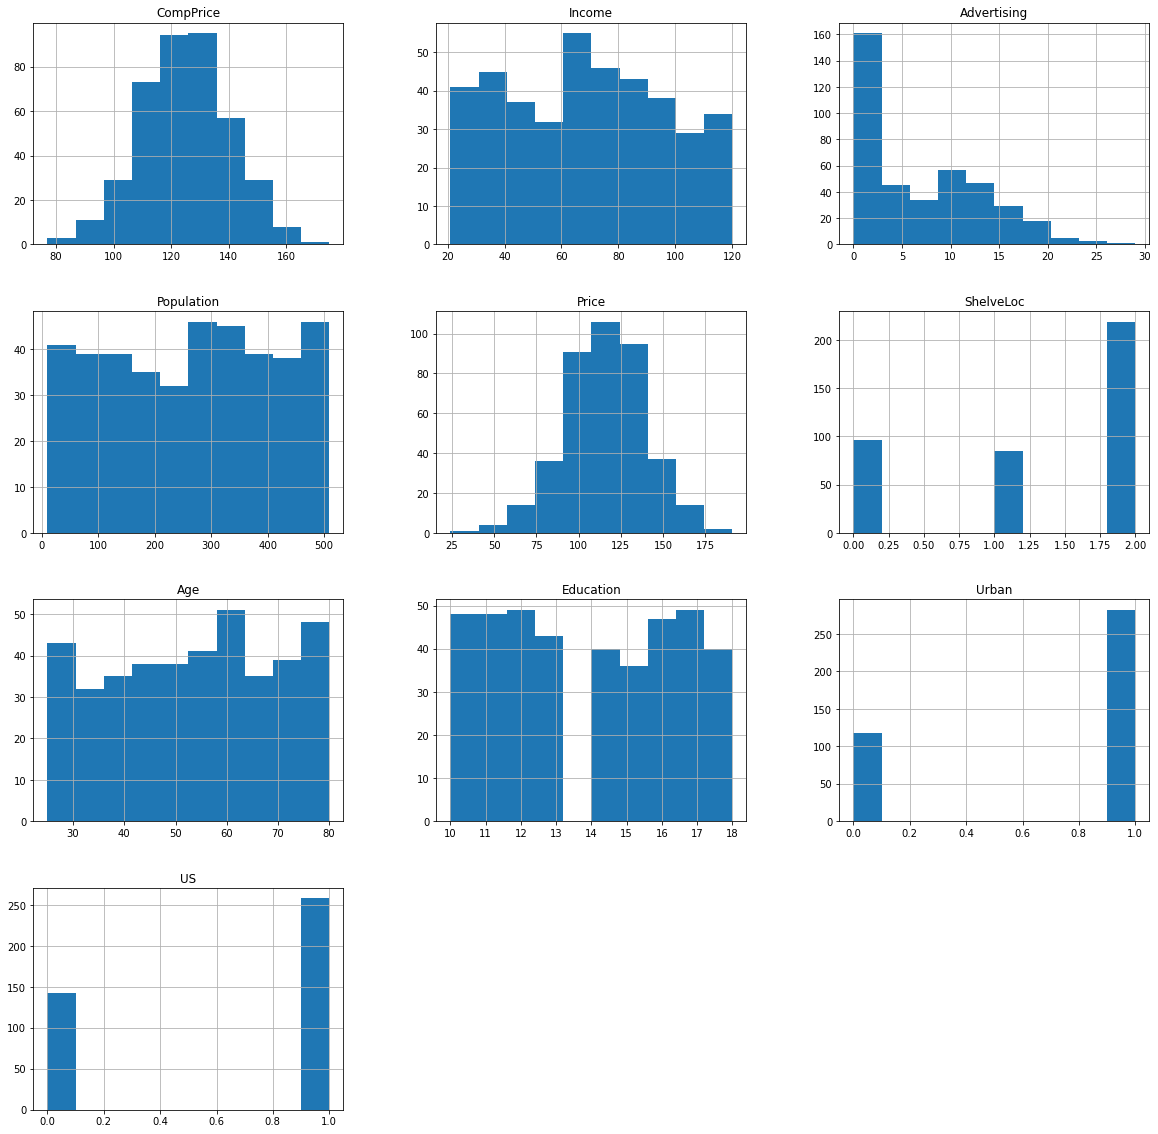

In [28]:
df.hist(figsize=(20,20))

<AxesSubplot:>

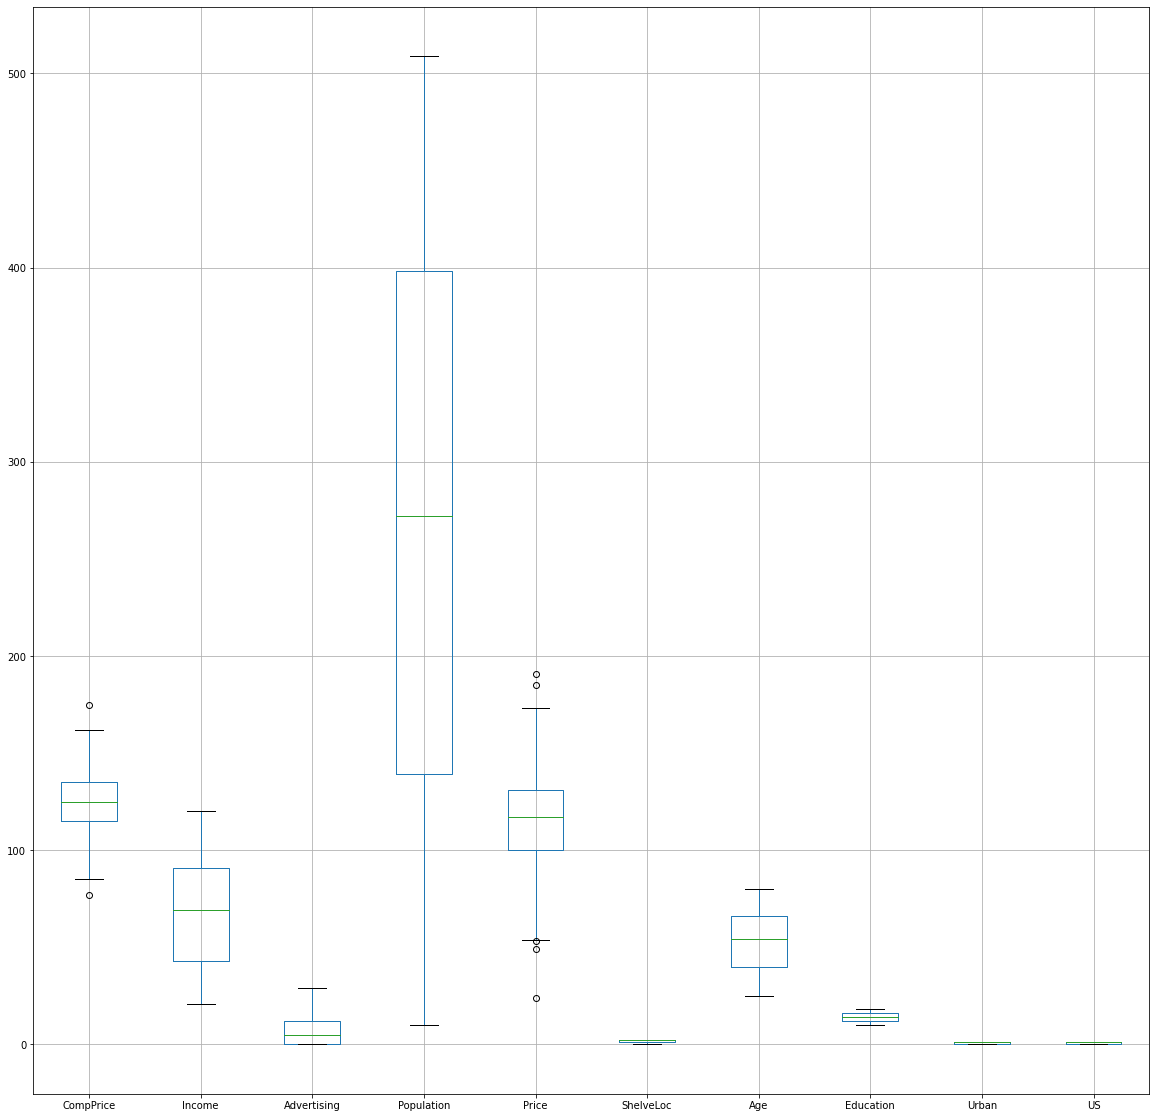

In [29]:
df.boxplot(figsize=(20,20))

In [30]:
#Splitting data into train and test

In [35]:
X = df.iloc[:,1:]
y = df['Sales']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 10)

In [39]:
y_test

332       Low
111    Medium
352      High
205       Low
56     Medium
        ...  
17       High
225    Medium
223       Low
59        Low
114    Medium
Name: Sales, Length: 120, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
model = RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [42]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array(['Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       '

In [46]:
pd.crosstab(y_test,y_pred)

col_0   Low  Medium
Sales              
Low      18      20
Medium   13      62
High      0       7

In [47]:
#Accuracy
np.mean(y_pred==y_test)

0.6666666666666666

In [48]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

40

In [50]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
         Low       0.58      0.47      0.52        38
      Medium       0.70      0.83      0.76        75

    accuracy                           0.67       120
   macro avg       0.43      0.43      0.43       120
weighted avg       0.62      0.67      0.64       120



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Improving the Model

- When we use the model_selection = train_test_split we got the accuracy as 66% and we try with KFold model_selection

In [51]:
from sklearn.model_selection import KFold

In [52]:
kfold = KFold(n_splits=10, shuffle = True, random_state=None)
model1 = RandomForestClassifier(n_estimators=100,max_features = 3)
results = cross_val_score(model1,X,y, cv=kfold)

In [53]:
print(results)

[0.675 0.8   0.7   0.65  0.75  0.725 0.725 0.85  0.675 0.7  ]


In [54]:
print(np.mean(results))

0.725


- The average accuracy of cross_val_score is 0.72% when we use the KFOLD model_selection

In [55]:
from sklearn.ensemble import BaggingClassifier

In [56]:
kfold1 = KFold(n_splits =10,shuffle = True, random_state = 10)
model2 = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features =3)
model3 = BaggingClassifier(base_estimator = model2,n_estimators =100,random_state=10)


In [57]:
results1 = cross_val_score(model3,X,y, cv=kfold1)

In [58]:
print(results1)

[0.65  0.8   0.625 0.85  0.7   0.8   0.725 0.725 0.7   0.725]


In [59]:
print(np.mean(results1))

0.73


In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
kfold2 = KFold(n_splits=10, random_state=10,shuffle=True)
model = AdaBoostClassifier(n_estimators=100, random_state=10)
results2 = cross_val_score(model, X, y, cv=kfold2)
print(results2.mean())

0.8025


- we get the average accuracy 80% by using ensemble technique AdaBoostClassifier